# Electromiografía: Visualización de músculos del antebrazo a distintas fuerzas.

## Flores Oliva Alejandro Elliot
###### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

##### Registros utilizados del reposotorio de la Dra.  Erin C. McKiernan (https://github.com/emckiernan/electrophys).

## Índice:
[1. Resumen](#Resumen)

[2. Configuración/Diseño del notebook. ](#Configuración/Diseñodelnotebook)

[3. Extraer y graficar los datos. ](#Extraerygraficarlosdatos)


<a id='Resumen'></a>
## Resumen

En este repositorio se extraerán y graficarán los registros de la actividad eléctrica de los músculos anteriores del antebrazo mediante registros a distintas fuerzas. Todas las grabaciones de electromiografía se obtuvieron utilizando Muscle SpikerBox y  Spirometer (Vernier model SPR-BTA)/LabQuest 2 standalone interface para tomar los datos. Cada registro se guardó como archivo de audio en formato .wav, .csv, .txt, .cmbl, utilizando el notebook de visualización podremos abrir esta señal (los registros utilizados en este notebook son del repositorio de la Dra. Erin Christy McKiernan: https://github.com/emckiernan/electrophys). En este notebook se utilizaron datos de un espirómetro es un dispositivo que permite registrar el volumen de aire en la respiración normal y forzada, también se utilizó un  Muscle SpikerBox  para registrar las activación eléctrica de los músculos que participan en la respiración.

<a id='Configuración/Diseñodelnotebook'></a>
## Configuración/Diseño del notebook

Importamos los módulos de Python para trazar figuras, gráficos en el cuaderno y crear figuras con buena resolución y etiquetas grandes.

#### Librerías utilizadas 

Importamos las librerías/ módulos que nos permitirán hacer cálculos, filtrar datos, utilizar filtros, análisis, etc. 

In [115]:
#Importamos las librerías necesarias para este notebook.
import numpy as np                   #Es una biblioteca para crear vectores y matrices grandes multidimensionales.
import matplotlib.pyplot as plt      #Nos provee de un framework de gráficos parecido a MATLAB.
import scipy as sc                   #Es una líbreria con herramientas y algoritmos matemáticos.
from scipy import signal             #Permite el procesamiento de señales, funciones de filtrado, diseño de filtros y algoritmos de interpolación en dimensiones. 
import wave                          #El módulo de “wave”proporciona una interfaz conveniente para el formato de sonido WAV.
import pandas as pd    #Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.
import csv             #El módulo csv permite leer y escribir datos tabulares en formato CSV. 
import math            #Permite usar funciones matemáticas definidas en el estándar de C.
from scipy.signal import butter, lfilter, filtfilt #Herramientas de procesamiento de señales, funciones de filtrado, algoritmos de interpolación.

#### Comandos para configuración de las imágenes/gráficos 

Configuramos para ver las figuras en notebook, creación de etiquetas, módulos para la creación de trazos.

In [116]:
#Comando para ver figuras en el cuaderno Jupyter
%matplotlib inline 

#Módulo de trazado de importación
import matplotlib.pyplot as plt 

#Comandos para crear figuras de alta resolución con etiquetas grandes
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18                              #Tamaño de fuente para etiquetas de figuras
plt.rcParams['axes.titlesize'] = 20                              #Tamaño de fuente para títulos de figuras
plt.rcParams['font.size'] = 16                                   #Tamaño de fuente para números de figura
plt.rcParams['lines.linewidth'] = 1.6                            #Ancho de línea para trazar

<a id='Extraerygraficarlosdatos'></a>
## Extraer y graficar los datos

Las grabaciones de EMG se obtuvieron utilizando Muscle SpikerBox y Spirometer (Vernier model SPR-BTA) para tomar los datos,también se usó la interfaz Logger LabQuest 2 standalone interface, se guardan como archivos de audio en formato .wav, .csv,.txt,cmbl. Utilizando las librerías para visualizar nuestros datos, posteriormente con el uso de otros comandos almacenaremos los resultados relevantes para los cálculos/ análisis posteriores.

### Abrimos la señal en formato .wav

In [117]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    #print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    #print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    #print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                           #Tamaño de la gráfica.
    #plt.title('SX_EMG') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

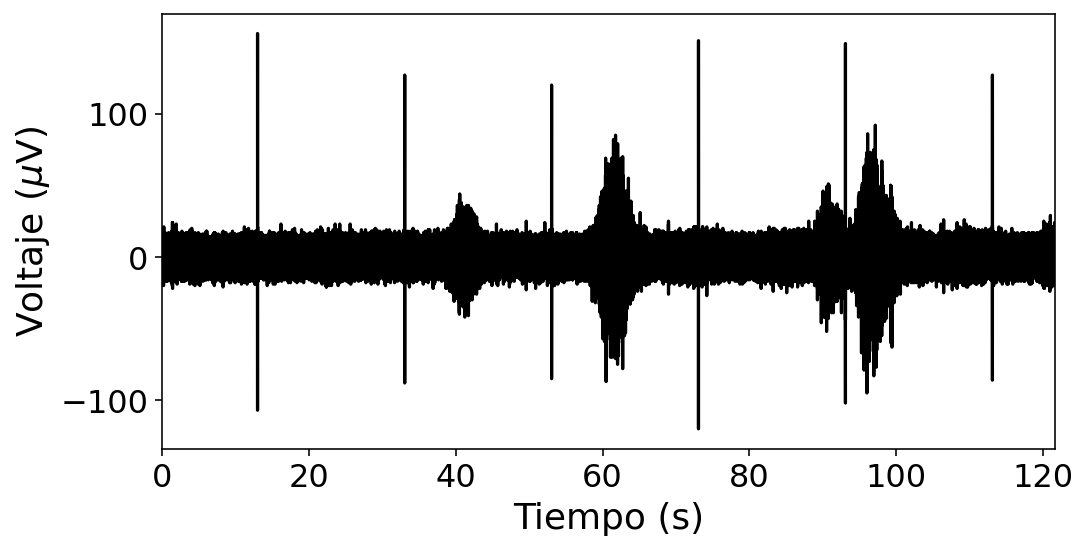

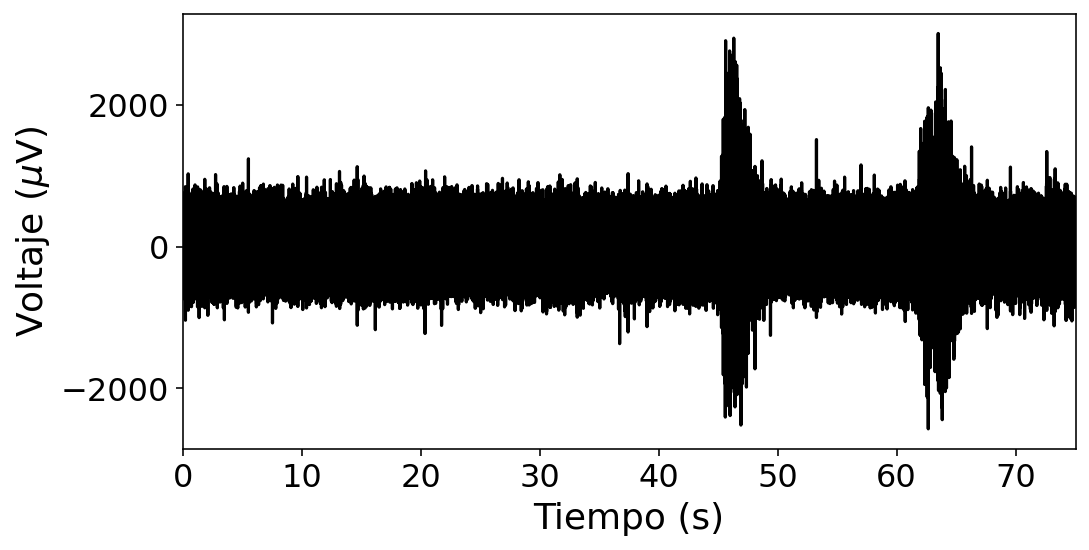

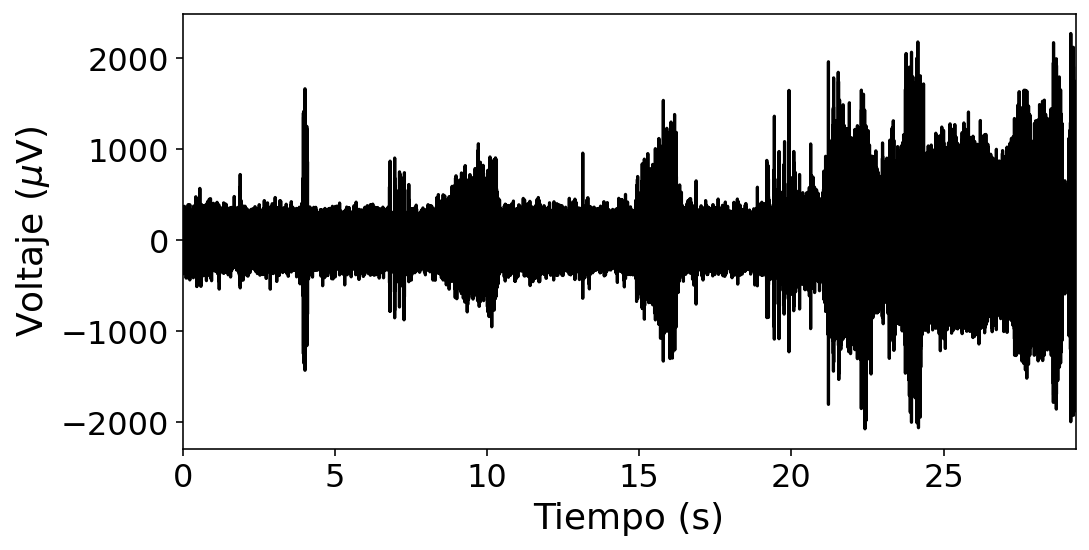

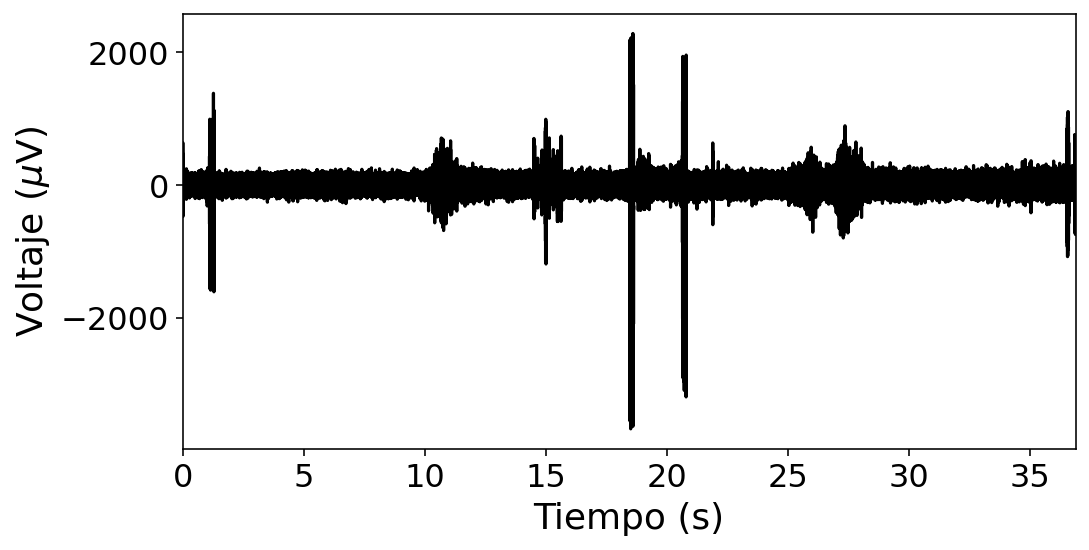

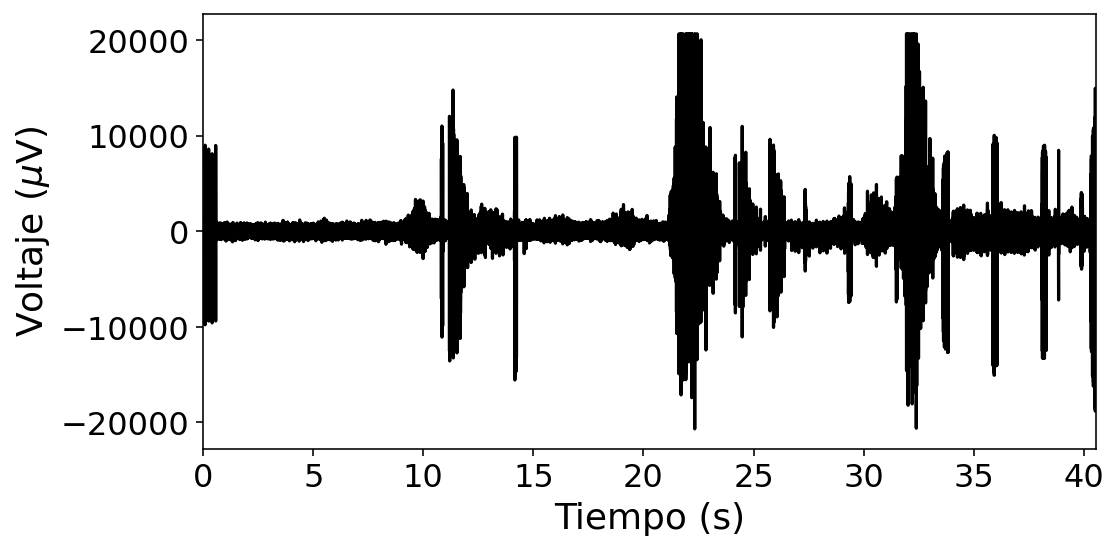

In [118]:
EMG(archivo='../Registros/S1/S1_EMG.wav')
EMG(archivo='../Registros/S2/S2_EMG.wav')
EMG(archivo='../Registros/S3/S3_EMG.wav')
EMG(archivo='../Registros/S4/S4_EMG.wav')
EMG(archivo='../Registros/S5/S5_EMG.wav')

### Abrimos la señal generada por el Spirometer (Vernier model SPR-BTA) y LabQuest 2 standalone interface.

#### Abrimos la señal en formatp .txt
Abrimos la señal generada por el Spirometer (Vernier model SPR-BTA), el formato del archivo está en texto sencillo (.txt), utilizamos el método “read[bytes]”, sirve para leer  todo el contenido de un archivo.

In [119]:
Archivo = open("../Registros/S3/S3_spirometry.txt", "r")
Vernier = Archivo.read()
print(Vernier)

ï»¿Vernier Format 2
erandimiograma.qmbl 25/06/2017 20:41:24 .
Serie 1
Tiempo	Caudal	Volumen
		Vol
s	L/s	L

0	-0.061294127634	-0
0.02	-0.061294127634	0.00122588255268
0.04	-0.061294127634	0.00245176510536
0.06	-0.0517726430262	0.00358243281196
0.08	-0.0517726430262	0.00461788567249
0.1	-0.061294127634	0.00574855337909
0.12	-0.061294127634	0.00697443593177
0.14	-0.061294127634	0.00820031848445
0.16	-0.061294127634	0.00942620103713
0.18	-0.0517726430262	0.0105568687437
0.2	-0.061294127634	0.0116875364503
0.22	-0.0714107050298	0.013014584777
0.24	-0.061294127634	0.0143416331036
0.26	-0.061294127634	0.0155675156563
0.28	-0.061294127634	0.016793398209
0.3	-0.061294127634	0.0180192807616
0.32	-0.061294127634	0.0192451633143
0.34	-0.061294127634	0.020471045867
0.36	-0.0517726430262	0.0216017135736
0.38	-0.061294127634	0.0227323812802
0.4	-0.061294127634	0.0239582638329
0.42	-0.061294127634	0.0251841463856
0.44	-0.061294127634	0.0264100289383
0.46	-0.0517726430262	0.0275406966449
0.48	-0.061294

Utilizando la librería de pandas (definida como pd) , utilizamos una función que nos permite leer datos del archivo ('filename.csv' ), esta función es pd.read_csv.


In [120]:
pd.read_csv("../Registros/S2/S2_spirometry.csv")

,Último: Tiempo (mín),Último: Tasa de Flujo (mL/s),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,-528,NaN,NaN,NaN
1,0,-745,NaN,NaN,NaN
2,0,-479,NaN,NaN,NaN
3,0,343,NaN,NaN,NaN
4,0,638,NaN,NaN,NaN
...,...,...,...,...,...
62,1,-41,NaN,NaN,NaN
63,1,-41,NaN,NaN,NaN
64,1,-41,NaN,NaN,NaN
65,1,-42,NaN,NaN,NaN


#### Cambiamos el formato de .cmbl a .csv.

Los registros obtenidos se guardan como archivos con la extensión  .cmbl, estos archivos .cmbl. Para términos prácticos decidimos extraer los datos almacenados en el archivo .cmbl y transformarlos en formato .csv.

Utilizando la función que nos permite leer datos del archivo (.csv) mediante  pd.read_csv.Trazamos una gráfica de los resultados dados mediante la interfaz.

Text(0, 0.5, 'Tasa de Flujo (mL/s)')

<Figure size 576x288 with 0 Axes>

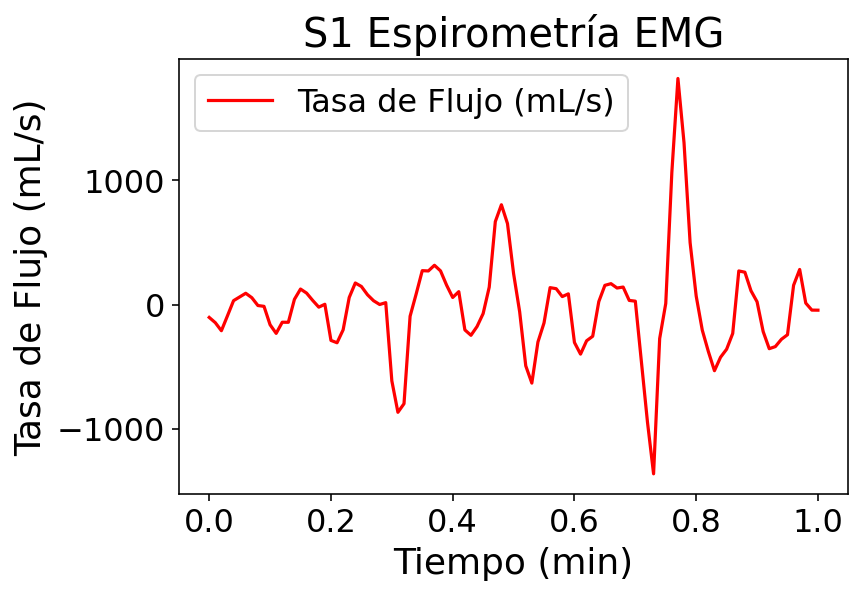

In [121]:
plt.figure(figsize=(8,4))                                                             #Tamaño de la gráfica
Vernier= pd.read_csv("../Registros/S1/S1_spirometryED2.csv")                          #Introducimos nuestro archivo .csv
Vernier.plot("Tiempo (mín)", "Tasa de Flujo (mL/s)",color='red')                      #Graficamos nuestros datos
#Graficamos EMG.
plt.title('S1 Espirometría EMG')  #Título.
plt.xlabel(r'Tiempo (min)')                                                            #Título del eje horizontal.
plt.ylabel(r'Tasa de Flujo (mL/s)')                                                    #Título del eje vertical.

Text(0, 0.5, 'Volumen pulmonar (L)')

<Figure size 576x288 with 0 Axes>

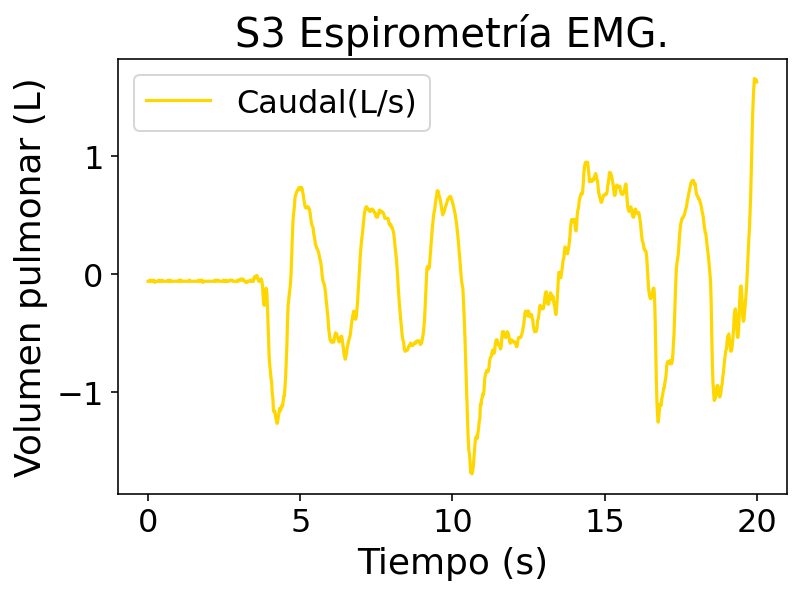

In [122]:
plt.figure(figsize=(8,4))                                                           #Tamaño de la gráfica
Vernier= pd.read_csv("../Registros/S3/S3_spirometryEd.csv")                         #Introducimos nuestro archivo .csv
Vernier.plot("Tiempo(s)", "Caudal(L/s)",color='gold')                               #Graficamos nuestros datos
#Graficamos EMG.
plt.title('S3 Espirometría EMG.')  #Título.
plt.xlabel(r'Tiempo (s)')                                                            #Título del eje horizontal.
plt.ylabel(r'Volumen pulmonar (L)')                                                  #Título del eje vertical.

Text(0, 0.5, 'Volumen pulmonar (L)')

<Figure size 576x288 with 0 Axes>

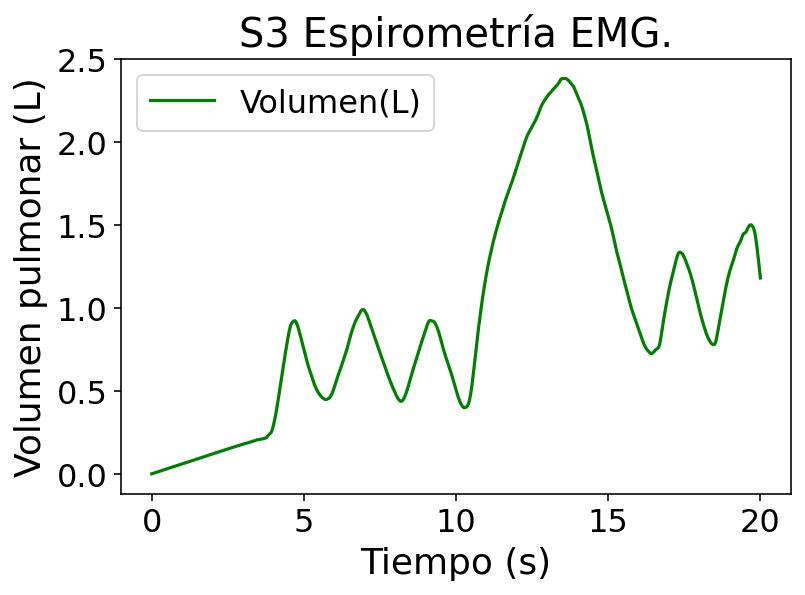

In [123]:
plt.figure(figsize=(8,4))                                                             #Tamaño de la gráfica
Vernier= pd.read_csv("../Registros/S3/S3_spirometryEd.csv")                           #Introducimos nuestro archivo .csv
Vernier.plot("Tiempo(s)", "Volumen(L)",color='green')                                 #Graficamos nuestros datos
#Graficamos EMG.
plt.title('S3 Espirometría EMG.')  #Título.
plt.xlabel(r'Tiempo (s)')                                                             #Título del eje horizontal.
plt.ylabel(r'Volumen pulmonar (L)')                                                   #Título del eje vertical.

### Referencias

Registros recuperados del repositorio elaborado por la Dra.Erin C. McKiernan y colaboradores, consultado en:
https://github.com/emckiernan/electrophys

Este trabajo fue apoyado por UNAM-DGAPA-PAPIME PE213817 y PE213219.